<a href="https://colab.research.google.com/github/lokeshippili/codsoft_taskno/blob/main/movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install nltk

In [ ]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("movies_genres.csv")
print(df)

   sno    MOVIE_NAME     GENRE     DESCRIPTION
0    1        pushpa    action        smuggler
1    2        devara    action         red sea
2    3         kalki     drama  arjuna yuddham
3    4  game changer  thriller       something
4    5           KGF    action     gold mining


In [ ]:
df.head(5)

,sno,MOVIE_NAME,GENRE,DESCRIPTION
0,1,pushpa,action,smuggler
1,2,devara,action,red sea
2,3,kalki,drama,arjuna yuddham
3,4,game changer,thriller,something
4,5,KGF,action,gold mining


In [ ]:
df.describe()

,sno
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
df['GENRE'].unique()


array(['action', 'drama', 'thriller'], dtype=object)

In [ ]:
df['GENRE'].value_counts()


,count
GENRE,
action,3
drama,1
thriller,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sno          5 non-null      int64 
 1   MOVIE_NAME   5 non-null      object
 2   GENRE        5 non-null      object
 3   DESCRIPTION  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
df=df[:14000]


In [ ]:
df['GENRE'].isnull().sum(),df['DESCRIPTION'].isnull().sum()


(0, 0)

([<matplotlib.patches.Wedge at 0x7ea0717f8f40>,
 [Text(-0.33991877217145816, 1.046162142464278, ' action '),
  Text(-0.33991852729952715, -1.04616222202798, ' drama '),
  Text(0.8899188088302002, -0.6465636192133282, ' thriller ')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.0%'),
  Text(-0.18541010579974207, -0.5706339392879891, '20.0%'),
  Text(0.48541025936192733, -0.3526710650254517, '20.0%')])

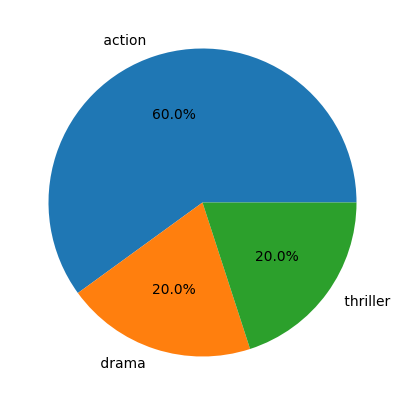

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['GENRE'].value_counts(),labels=[' action ', ' drama ', ' thriller '],autopct='%0.1f%%')


In [ ]:
def remove_punct(text):
    import string as st
    punct=st.punctuation
    new_text=''.join([char for char in text if char not in punct])
    return new_text

df['DESCRIPTION']=df['DESCRIPTION'].apply(lambda x:remove_punct(x))

In [ ]:
df.tail()

,sno,MOVIE_NAME,GENRE,DESCRIPTION
0,1,pushpa,action,smuggler
1,2,devara,action,red sea
2,3,kalki,drama,arjuna yuddham
3,4,game changer,thriller,something
4,5,KGF,action,gold mining


In [ ]:
df['DESCRIPTION']=df['DESCRIPTION'].apply(lambda x:x.lower())
df.head()

,sno,MOVIE_NAME,GENRE,DESCRIPTION
0,1,pushpa,action,smuggler
1,2,devara,action,red sea
2,3,kalki,drama,arjuna yuddham
3,4,game changer,thriller,something
4,5,KGF,action,gold mining


In [7]:
# Import pandas to work with DataFrames
import pandas as pd
import nltk

nltk.download('punkt')

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv("movies_genres.csv")

def toknize(text):
    from nltk.tokenize import word_tokenize
    new_text = word_tokenize(text)
    return new_text

df['DESCRIPTION'] = df['DESCRIPTION'].apply(lambda x: toknize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
df.head(5)

,sno,MOVIE_NAME,GENRE,DESCRIPTION
0,1,pushpa,action,[smuggler]
1,2,devara,action,"[red, sea]"
2,3,kalki,drama,"[arjuna, yuddham]"
3,4,game changer,thriller,[something]
4,5,KGF,action,"[gold, mining]"


In [10]:
def stemming(text):
    from nltk import PorterStemmer
    ps=PorterStemmer().stem
    # dir(PorterStemmer())
    new_text=" ".join([ps(word) for word in text ])
    return new_text
df['DESCRIPTION']=df['DESCRIPTION'].apply(lambda x : stemming(x))

In [11]:
df.head(5)

,sno,MOVIE_NAME,GENRE,DESCRIPTION
0,1,pushpa,action,smuggler
1,2,devara,action,red sea
2,3,kalki,drama,arjuna yuddham
3,4,game changer,thriller,someth
4,5,KGF,action,gold mine


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer()

Description_tf_idf=tf_idf.fit_transform(df['DESCRIPTION'])

print(Description_tf_idf.shape)

Description_tf_idf=pd.DataFrame(Description_tf_idf.toarray())
Description_tf_idf.columns = tf_idf.get_feature_names_out()

Description_tf_idf

(5, 8)


,arjuna,gold,mine,red,sea,smuggler,someth,yuddham
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.707107,0.707107,0.0,0.0,0.000000
2,0.707107,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.707107
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
4,0.000000,0.707107,0.707107,0.000000,0.000000,0.0,0.0,0.000000


In [15]:
df['DESCRIPTION len']=df['DESCRIPTION'].apply(lambda x:len(x)-x.count(' '))
df.head(10)

,sno,MOVIE_NAME,GENRE,DESCRIPTION,DESCRIPTION len
0,1,pushpa,action,smuggler,8
1,2,devara,action,red sea,6
2,3,kalki,drama,arjuna yuddham,13
3,4,game changer,thriller,someth,6
4,5,KGF,action,gold mine,8


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['DESCRIPTION_len_sclr'] = scaler.fit_transform(df['DESCRIPTION len'].values.reshape(-1, 1))
df.head(5)

,sno,MOVIE_NAME,GENRE,DESCRIPTION,DESCRIPTION len,DESCRIPTION_len_sclr
0,1,pushpa,action,smuggler,8,0.285714
1,2,devara,action,red sea,6,0.000000
2,3,kalki,drama,arjuna yuddham,13,1.000000
3,4,game changer,thriller,someth,6,0.000000
4,5,KGF,action,gold mine,8,0.285714


In [17]:
target=df['GENRE']
feature=df.drop(['GENRE','MOVIE_NAME','DESCRIPTION','DESCRIPTION len'],axis=1)

In [18]:
target

,GENRE
0,action
1,action
2,drama
3,thriller
4,action


In [19]:
feature

,sno,DESCRIPTION_len_sclr
0,1,0.285714
1,2,0.000000
2,3,1.000000
3,4,0.000000
4,5,0.285714


In [20]:
target.shape, feature.shape

((5,), (5, 2))

In [22]:
Description_tf_idf.head()

,arjuna,gold,mine,red,sea,smuggler,someth,yuddham
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.707107,0.707107,0.0,0.0,0.000000
2,0.707107,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.707107
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
4,0.000000,0.707107,0.707107,0.000000,0.000000,0.0,0.0,0.000000


In [25]:
print(feature.shape)
print(Description_tf_idf.shape)

(5, 2)
(5, 8)


In [26]:
feature.reset_index(drop=True, inplace=True)
Description_tf_idf.reset_index(drop=True, inplace=True)
feature = pd.concat([feature, pd.DataFrame(Description_tf_idf)], axis=1)

In [27]:
feature.shape

(5, 10)

In [28]:
feature.head()

,sno,DESCRIPTION_len_sclr,arjuna,gold,mine,red,sea,smuggler,someth,yuddham
0,1,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000
1,2,0.000000,0.000000,0.000000,0.000000,0.707107,0.707107,0.0,0.0,0.000000
2,3,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.707107
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
4,5,0.285714,0.000000,0.707107,0.707107,0.000000,0.000000,0.0,0.0,0.000000


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2)

In [30]:
print('x_train:',x_train.shape,'x_test:',x_test.shape,'y_train:',y_train.shape,'y_test:',y_test.shape)

x_train: (4, 10) x_test: (1, 10) y_train: (4,) y_test: (1,)


In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [32]:
model=RandomForestClassifier(n_estimators=150,max_depth=50)

In [33]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=150)

In [34]:
model.score(x_test,y_test)

0.0

In [35]:
from joblib import dump

dump(model, 'Random_forest_model.joblib')

['Random_forest_model.joblib']